In [1]:
import pandas as pd

In [2]:
df_openinsider = pd.read_csv('output_openinsider.csv')

In [3]:
df_openinsider['date'] = pd.to_datetime(df_openinsider['date'])  # Convert 'date' to datetime format

# Create new columns for year, month, and day
df_openinsider['year'] = df_openinsider['date'].dt.year
df_openinsider['month'] = df_openinsider['date'].dt.month
df_openinsider['day'] = df_openinsider['date'].dt.day

In [4]:
df_openinsider = df_openinsider[df_openinsider['percentage_of_market_cap'] != 0]

In [5]:
df_recommendations = pd.read_csv('output_recommendations.csv')

In [6]:
columns_to_drop = ['Unnamed: 0','Company Name']
df_recommendations.drop(columns=columns_to_drop, inplace=True)

In [7]:
df_recommendations.rename(columns={'Company Name': 'Date'}, inplace=True)

In [8]:
df_recommendations

,Ticker,Date,Stock Price on day of recommendation,Stock Price after 4 weeks,Rating_Category,Year,Month,Day
0,MMM,2012-07-12,68.047295,72.126488,Hold,2012,7,12
1,MMM,2012-07-16,69.378143,72.764351,Buy,2012,7,16
2,MMM,2012-09-05,72.712753,74.321533,Hold,2012,9,5
3,MMM,2012-09-10,71.856827,75.581635,Hold,2012,9,10
4,MMM,2012-09-24,74.281921,73.330910,Buy,2012,9,24
...,...,...,...,...,...,...,...,...
66511,ZTS,2020-07-30,148.472015,158.927094,Hold,2020,7,30
66512,ZTS,2020-08-12,158.678162,158.230103,Hold,2020,8,12
66513,ZTS,2020-08-20,157.861664,159.783417,Hold,2020,8,20
66514,ZTS,2020-09-21,160.281265,159.305481,Buy,2020,9,21


In [9]:
# Assuming df is your DataFrame and 'rating_category' is the column you want to modify
df_recommendations['Rating_Category'] = df_recommendations['Rating_Category'].map({'Buy': 1, 'Sell': 0, 'Hold': 1})

# Drop rows with 'Other' in 'rating_category'
df_recommendations = df_recommendations[df_recommendations['Rating_Category'].notna()]

# Resetting the index after dropping rows
df_recommendations.reset_index(drop=True, inplace=True)

In [10]:
df_recommendations

,Ticker,Date,Stock Price on day of recommendation,Stock Price after 4 weeks,Rating_Category,Year,Month,Day
0,MMM,2012-07-12,68.047295,72.126488,1.0,2012,7,12
1,MMM,2012-07-16,69.378143,72.764351,1.0,2012,7,16
2,MMM,2012-09-05,72.712753,74.321533,1.0,2012,9,5
3,MMM,2012-09-10,71.856827,75.581635,1.0,2012,9,10
4,MMM,2012-09-24,74.281921,73.330910,1.0,2012,9,24
...,...,...,...,...,...,...,...,...
66340,ZTS,2020-07-30,148.472015,158.927094,1.0,2020,7,30
66341,ZTS,2020-08-12,158.678162,158.230103,1.0,2020,8,12
66342,ZTS,2020-08-20,157.861664,159.783417,1.0,2020,8,20
66343,ZTS,2020-09-21,160.281265,159.305481,1.0,2020,9,21


In [17]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt

In [11]:
len(df_recommendations)

66345

In [12]:
len(df_openinsider)

101697

In [58]:
df = pd.read_csv('processed_dataset.csv')
len(df)

13604

In [59]:
# Drop the 'Unnamed: 0' column
df = df.drop('Unnamed: 0', axis=1)

In [68]:
df

,ticker,year,month,Stock Price on day of recommendation,Stock Price after 4 weeks,Rating_Category,Value,transaction_type_category,percentage_of_market_cap
0,A,2012,2,0.007063,0.007509,1.0,-206406,0.0,0.000017
1,A,2012,3,0.006802,0.007351,1.0,-757262,0.0,0.000061
2,A,2012,4,0.006758,0.006463,1.0,-222550,0.0,0.000018
3,A,2012,8,0.006038,0.006265,1.0,65306,1.0,0.000005
4,A,2012,11,0.005891,0.006773,1.0,-3864977,0.0,0.000313
...,...,...,...,...,...,...,...,...,...
13599,ZTS,2020,5,0.031546,0.036069,1.0,-2113777,0.0,0.000078
13600,ZTS,2020,7,0.037387,0.040713,1.0,-916823,0.0,0.000034
13601,ZTS,2020,8,0.040302,0.041017,1.0,-5161548,0.0,0.000191
13602,ZTS,2020,9,0.040818,0.041094,1.0,-362484,0.0,0.000013


In [69]:
df = df[['Stock Price on day of recommendation', 'Rating_Category', 'year', 'month', 'Stock Price after 4 weeks', 'Rating_Category', 'Value', 'transaction_type_category', 'percentage_of_market_cap']]
df = df.dropna()

In [70]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_squared_error
# Check if normalization is needed
# Let's normalize the numerical columns if necessary
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

In [71]:
# Define features (X) and target (y)
X = df.drop('Stock Price after 4 weeks', axis=1)
y = df['Stock Price after 4 weeks']

In [72]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Linear Regression model
linear_model = LinearRegression()
linear_model.fit(X_train, y_train)

LinearRegression()

In [73]:
# Make predictions
y_pred = linear_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")

# Optionally, you can print the model coefficients
print("Model Coefficients:")
print(linear_model.coef_)

Mean Squared Error: 1.0449132858259389e-05
Model Coefficients:
[ 1.02460196e+00 -1.29886428e-05  3.53007340e-05  3.26714367e-05
 -1.29573202e-05  1.33870173e-12 -7.92138342e-05  9.60258900e-03]


Mean Squared Error: 1.0449132858259389e-05


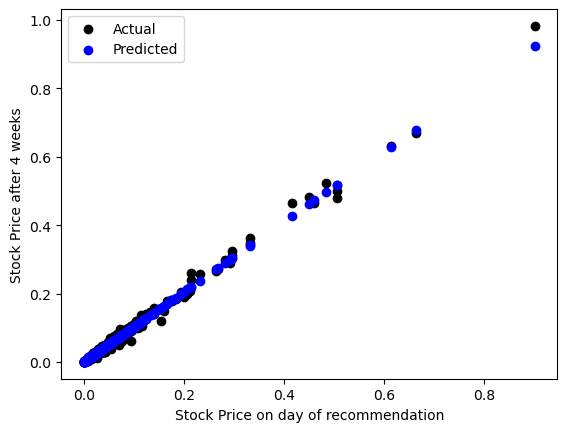

In [74]:
# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error: {mse}")
# Visualize the predicted vs actual values
plt.scatter(X_test['Stock Price on day of recommendation'], y_test, color='black', label='Actual')
plt.scatter(X_test['Stock Price on day of recommendation'], y_pred, color='blue', label='Predicted')
plt.xlabel('Stock Price on day of recommendation')
plt.ylabel('Stock Price after 4 weeks')
plt.legend()
plt.show()

# Linear Regression

In [55]:
# Assuming df is your DataFrame
# Drop unnecessary columns and handle missing values
df = df_recommendations[['Stock Price on day of recommendation', 'Rating_Category', 'Year', 'Month', 'Day', 'Stock Price after 4 weeks']]
df = df.dropna()

# Check if normalization is needed
# Let's normalize the numerical columns if necessary
numeric_cols = df.select_dtypes(include=['float64']).columns
df[numeric_cols] = MinMaxScaler().fit_transform(df[numeric_cols])

# Extract features and target variable
X = df[['Stock Price on day of recommendation', 'Rating_Category', 'Year', 'Month', 'Day']]
y = df['Stock Price after 4 weeks']


# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [40]:
# Initialize and train the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

Mean Squared Error: 1.690931912933654e-05


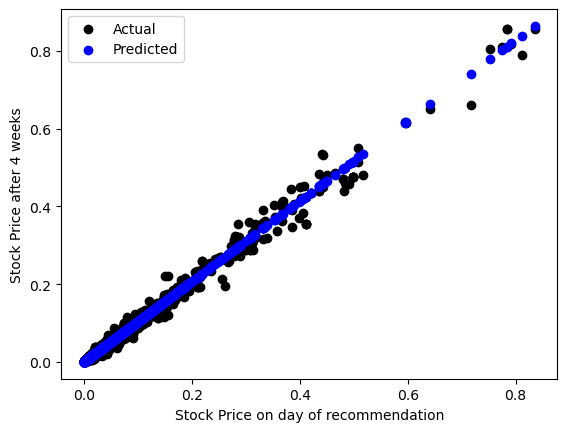

In [41]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predicted vs actual values
plt.scatter(X_test['Stock Price on day of recommendation'], y_test, color='black', label='Actual')
plt.scatter(X_test['Stock Price on day of recommendation'], y_pred, color='blue', label='Predicted')
plt.xlabel('Stock Price on day of recommendation')
plt.ylabel('Stock Price after 4 weeks')
plt.legend()
plt.show()

# Decision Tree

In [75]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(random_state=42)

In [76]:
from sklearn.metrics import mean_squared_error

# Make predictions on the test set
y_pred = model.predict(X_test)

# Calculate Mean Squared Error
mse = mean_squared_error(y_test, y_pred)

print(f"Mean Squared Error: {mse}")

Mean Squared Error: 1.9047432586502642e-05


Mean Squared Error: 266.02699517265677


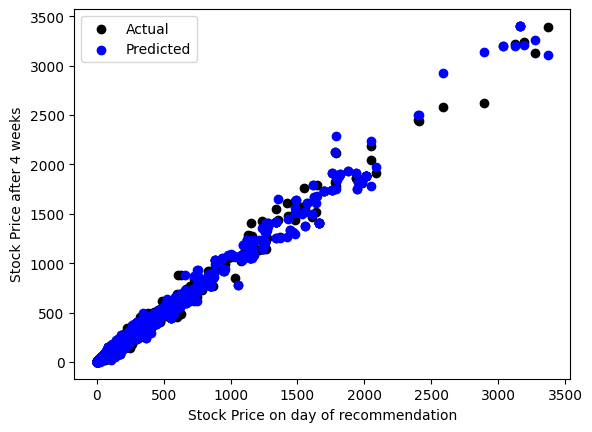

In [49]:
# Make predictions on the testing set
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

# Visualize the predicted vs actual values
plt.scatter(X_test['Stock Price on day of recommendation'], y_test, color='black', label='Actual')
plt.scatter(X_test['Stock Price on day of recommendation'], y_pred, color='blue', label='Predicted')
plt.xlabel('Stock Price on day of recommendation')
plt.ylabel('Stock Price after 4 weeks')
plt.legend()
plt.show()

In [44]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(max_depth=2, random_state=42)
model.fit(X_train, y_train)

DecisionTreeRegressor(max_depth=2, random_state=42)

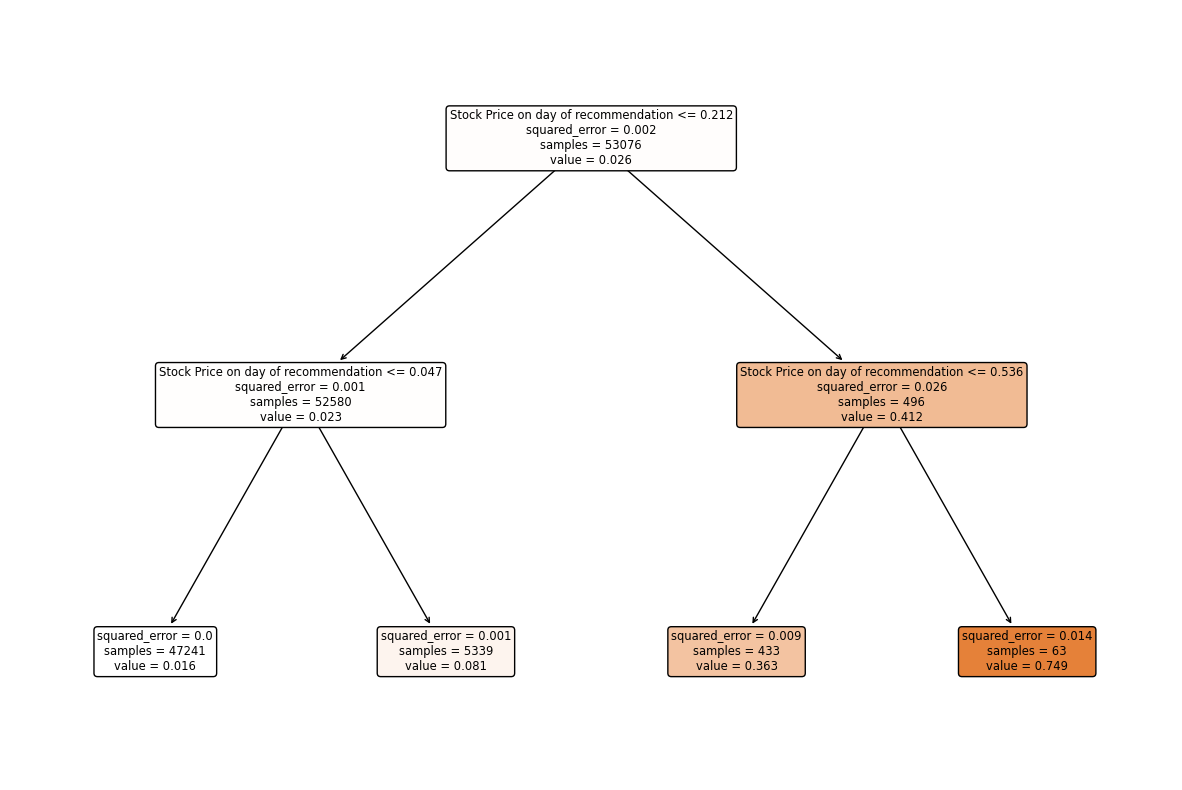

In [45]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

In [62]:
from sklearn.tree import DecisionTreeRegressor

# Initialize and train the Decision Tree model
model = DecisionTreeRegressor(random_state=42)
model.fit(X_train[0:int(len(X_train)*0.0001)], y_train[0:int(len(y_train)*0.0001)])

DecisionTreeRegressor(random_state=42)

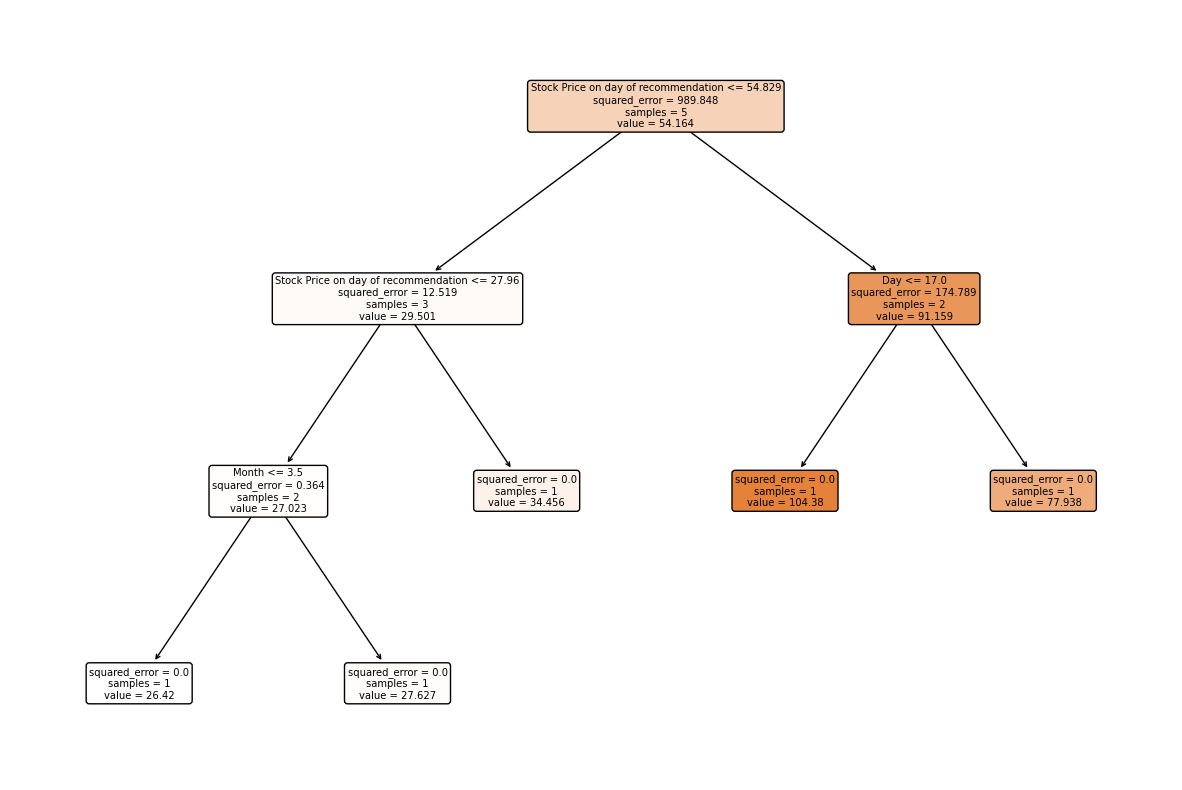

In [63]:
from sklearn.tree import plot_tree

# Visualize the Decision Tree
plt.figure(figsize=(15, 10))
plot_tree(model, feature_names=X.columns, filled=True, rounded=True)
plt.show()

# LSTM

In [77]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense

# Normalize data using MinMaxScaler
scaler = MinMaxScaler(feature_range=(0, 1))
X_scaled = scaler.fit_transform(X)
y_scaled = scaler.fit_transform(y.values.reshape(-1, 1))

# Reshape data for LSTM input (samples, time steps, features)
X_lstm = X_scaled.reshape((X_scaled.shape[0], 1, X_scaled.shape[1]))

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_lstm, y_scaled, test_size=0.2, random_state=42)

# Build LSTM model
model = Sequential()
model.add(LSTM(units=50, return_sequences=True, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(LSTM(units=50))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
model.fit(X_train, y_train, epochs=50, batch_size=32, validation_data=(X_test, y_test), verbose=1)

Epoch 1/50
341/341 [==============================] - 17s 17ms/step - loss: 9.4439e-04 - val_loss: 1.8929e-05
Epoch 2/50
341/341 [==============================] - 3s 9ms/step - loss: 2.2991e-05 - val_loss: 1.3750e-05
Epoch 3/50
341/341 [==============================] - 3s 10ms/step - loss: 1.9413e-05 - val_loss: 1.2338e-05
Epoch 4/50
341/341 [==============================] - 3s 9ms/step - loss: 1.9335e-05 - val_loss: 1.7891e-05
Epoch 5/50
341/341 [==============================] - 3s 10ms/step - loss: 1.7854e-05 - val_loss: 1.2910e-05
Epoch 6/50
341/341 [==============================] - 3s 9ms/step - loss: 1.6188e-05 - val_loss: 1.2209e-05
Epoch 7/50
341/341 [==============================] - 3s 9ms/step - loss: 1.5661e-05 - val_loss: 1.7485e-05
Epoch 8/50
341/341 [==============================] - 3s 10ms/step - loss: 1.6143e-05 - val_loss: 1.9715e-05
Epoch 9/50
341/341 [==============================] - 3s 9ms/step - loss: 1.9805e-05 - val_loss: 1.6868e-05
Epoch 10/50
341/341 [==

86/86 [==============================] - 2s 4ms/step


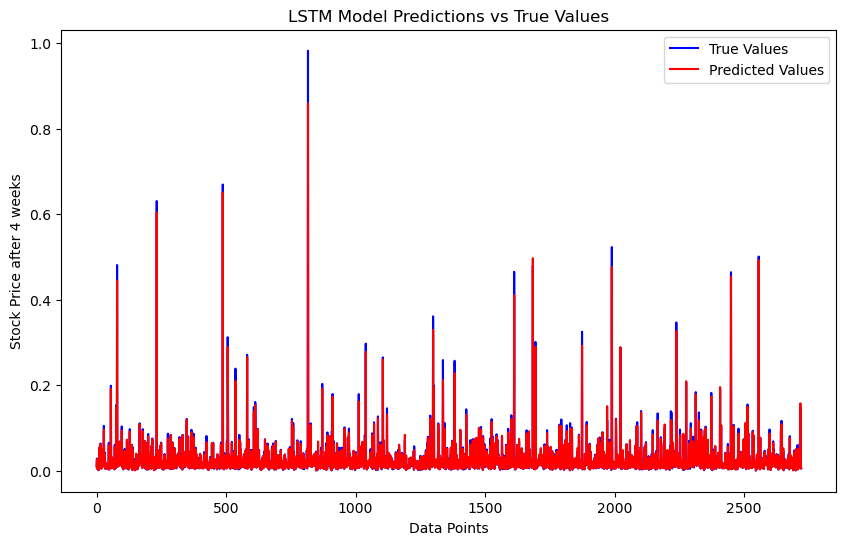

In [78]:
# Make predictions on the testing set
y_pred_scaled = model.predict(X_test)

# Inverse transform predictions to original scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test)

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('LSTM Model Predictions vs True Values')
plt.xlabel('Data Points')
plt.ylabel('Stock Price after 4 weeks')
plt.legend()
plt.show()

In [79]:
from sklearn.metrics import mean_squared_error

mse = mean_squared_error(y_test_original, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 1.9119894120337767e-05


2/2 [==============================] - 0s 10ms/step


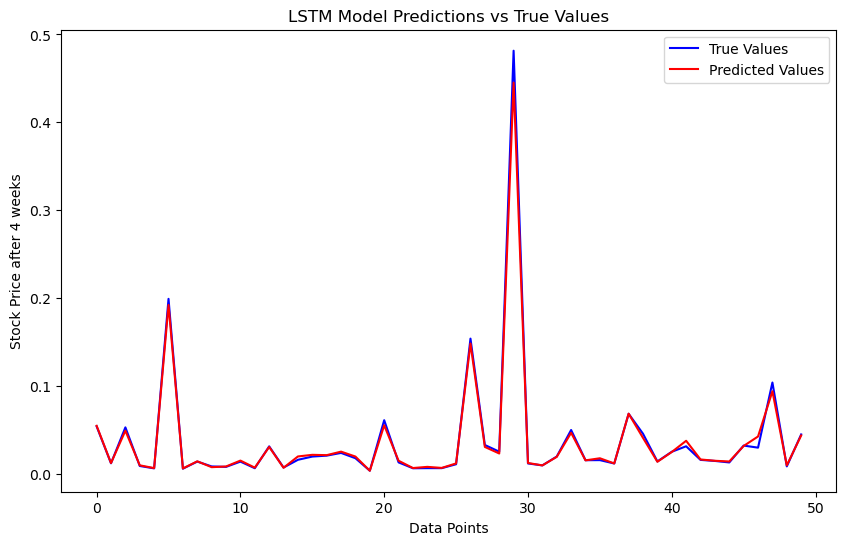

In [81]:
# Make predictions on the testing set
y_pred_scaled = model.predict(X_test[50:100])

# Inverse transform predictions to original scale
y_pred = scaler.inverse_transform(y_pred_scaled)
y_test_original = scaler.inverse_transform(y_test[50:100])

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(y_test_original, label='True Values', color='blue')
plt.plot(y_pred, label='Predicted Values', color='red')
plt.title('LSTM Model Predictions vs True Values')
plt.xlabel('Data Points')
plt.ylabel('Stock Price after 4 weeks')
plt.legend()
plt.show()

# Open Insider

In [36]:
# Convert 'Date' column to datetime format
df_recommendations['Date'] = pd.to_datetime(df_recommendations['Date'])

C:\Users\TAADOLU8\AppData\Local\Temp\ipykernel_18600\1530991255.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_recommendations['Date'] = pd.to_datetime(df_recommendations['Date'])


In [77]:
# Group by 'Ticker', 'Year', and 'Month'
grouped_df = df_recommendations.groupby(['Ticker', 'Year', 'Month']).agg({
    'Stock Price on day of recommendation': 'mean',
    'Stock Price after 4 weeks': 'mean',
    'Rating_Category': 'mean'  # Use mode for Rating_Category
}).reset_index()

In [64]:
# Function to clean and convert the 'Value' column
def clean_and_convert(value):
    # Remove non-numeric characters and convert to integer
    return int(''.join(c for c in value if c.isdigit() or c == '-'))

# Apply the function to the 'Value' column
df_openinsider['Value'] = df_openinsider['Value'].apply(clean_and_convert)

In [85]:
# Group by 'Ticker', 'Year', and 'Month'
grouped_df1 = df_openinsider.groupby(['ticker', 'year', 'month']).agg({
    'Value': 'sum',
    'transaction_type_category': 'mean',
    'percentage_of_market_cap': 'sum'
}).reset_index()

In [86]:
grouped_df1

,ticker,year,month,Value,transaction_type_category,percentage_of_market_cap
0,A,2011,12,-169722,0.0,0.000004
1,A,2012,1,-195631,0.0,0.000005
2,A,2012,2,-206406,0.0,0.000005
3,A,2012,3,-757262,0.0,0.000019
4,A,2012,4,-222550,0.0,0.000005
...,...,...,...,...,...,...
32307,ZTS,2023,4,-763228,0.0,0.000009
32308,ZTS,2023,5,-2295335,0.0,0.000026
32309,ZTS,2023,8,-2563503,0.0,0.000029
32310,ZTS,2023,9,-2128249,0.0,0.000024


In [68]:
grouped_df

,Ticker,Year,Month,Stock Price on day of recommendation,Stock Price after 4 weeks,Rating_Category
0,A,2012,2,28.726511,30.056978,1.0
1,A,2012,3,27.710627,29.448151,1.0
2,A,2012,4,27.536613,26.032343,1.0
3,A,2012,5,26.610407,25.927248,1.0
4,A,2012,7,24.428625,25.334239,1.0
...,...,...,...,...,...,...
29111,ZTS,2020,5,124.146824,139.966576,1.0
29112,ZTS,2020,7,146.908737,157.836777,1.0
29113,ZTS,2020,8,158.269913,159.006760,1.0
29114,ZTS,2020,9,160.281265,159.305481,1.0


In [79]:
grouped_df = grouped_df.rename(columns={'Ticker': 'ticker', 'Year': 'year', 'Month': 'month'})

In [87]:
merged_df = pd.merge(grouped_df, grouped_df1, on=['ticker', 'year', 'month'], how='inner')

In [89]:
merged_df

,ticker,year,month,Stock Price on day of recommendation,Stock Price after 4 weeks,Rating_Category,Value,transaction_type_category,percentage_of_market_cap
0,A,2012,2,28.726511,30.056978,1.0,-206406,0.0,0.000005
1,A,2012,3,27.710627,29.448151,1.0,-757262,0.0,0.000019
2,A,2012,4,27.536613,26.032343,1.0,-222550,0.0,0.000005
3,A,2012,8,24.734064,25.268382,1.0,65306,1.0,0.000002
4,A,2012,11,24.160285,27.224276,1.0,-3864977,0.0,0.000095
...,...,...,...,...,...,...,...,...,...
13599,ZTS,2020,5,124.146824,139.966576,1.0,-2113777,0.0,0.000024
13600,ZTS,2020,7,146.908737,157.836777,1.0,-916823,0.0,0.000010
13601,ZTS,2020,8,158.269913,159.006760,1.0,-5161548,0.0,0.000058
13602,ZTS,2020,9,160.281265,159.305481,1.0,-362484,0.0,0.000004


In [90]:
merged_df.to_csv('processed_dataset.csv')